<a href="https://colab.research.google.com/github/X4D0/CPNS-Scraper/blob/main/CPNS_Scrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Share Link: http://gg.gg/ScraperCPNS

# **CPNS SCRAPER**

> Program ini dibuat untuk membantu memudahkan mencari formasi CPNS sesuai Program Studi dengan mengambil seluruh data dari halaman awal hingga akhir dan menuliskannya ke dalam file Excel.

Cara:

1. Klik File > Save a Copy in Drive
2. Notebook serupa akan terbuka di tab baru. Apabila tidak maka bisa buka file-nya di Drive milik akun kalian (Pada folder Colab Notebooks)
1. Sebelum memulai diperlukan Kode Pendidikan yang bisa didapat dengan cara buka https://sscasn.bkn.go.id/ di PC dengan browser Chrome/Firefox
2. Buka Dev Tools dengan cara klik kanan pada halaman web lalu pilih Inspect Element atau CTRL+SHIFT+I pada Chrome.
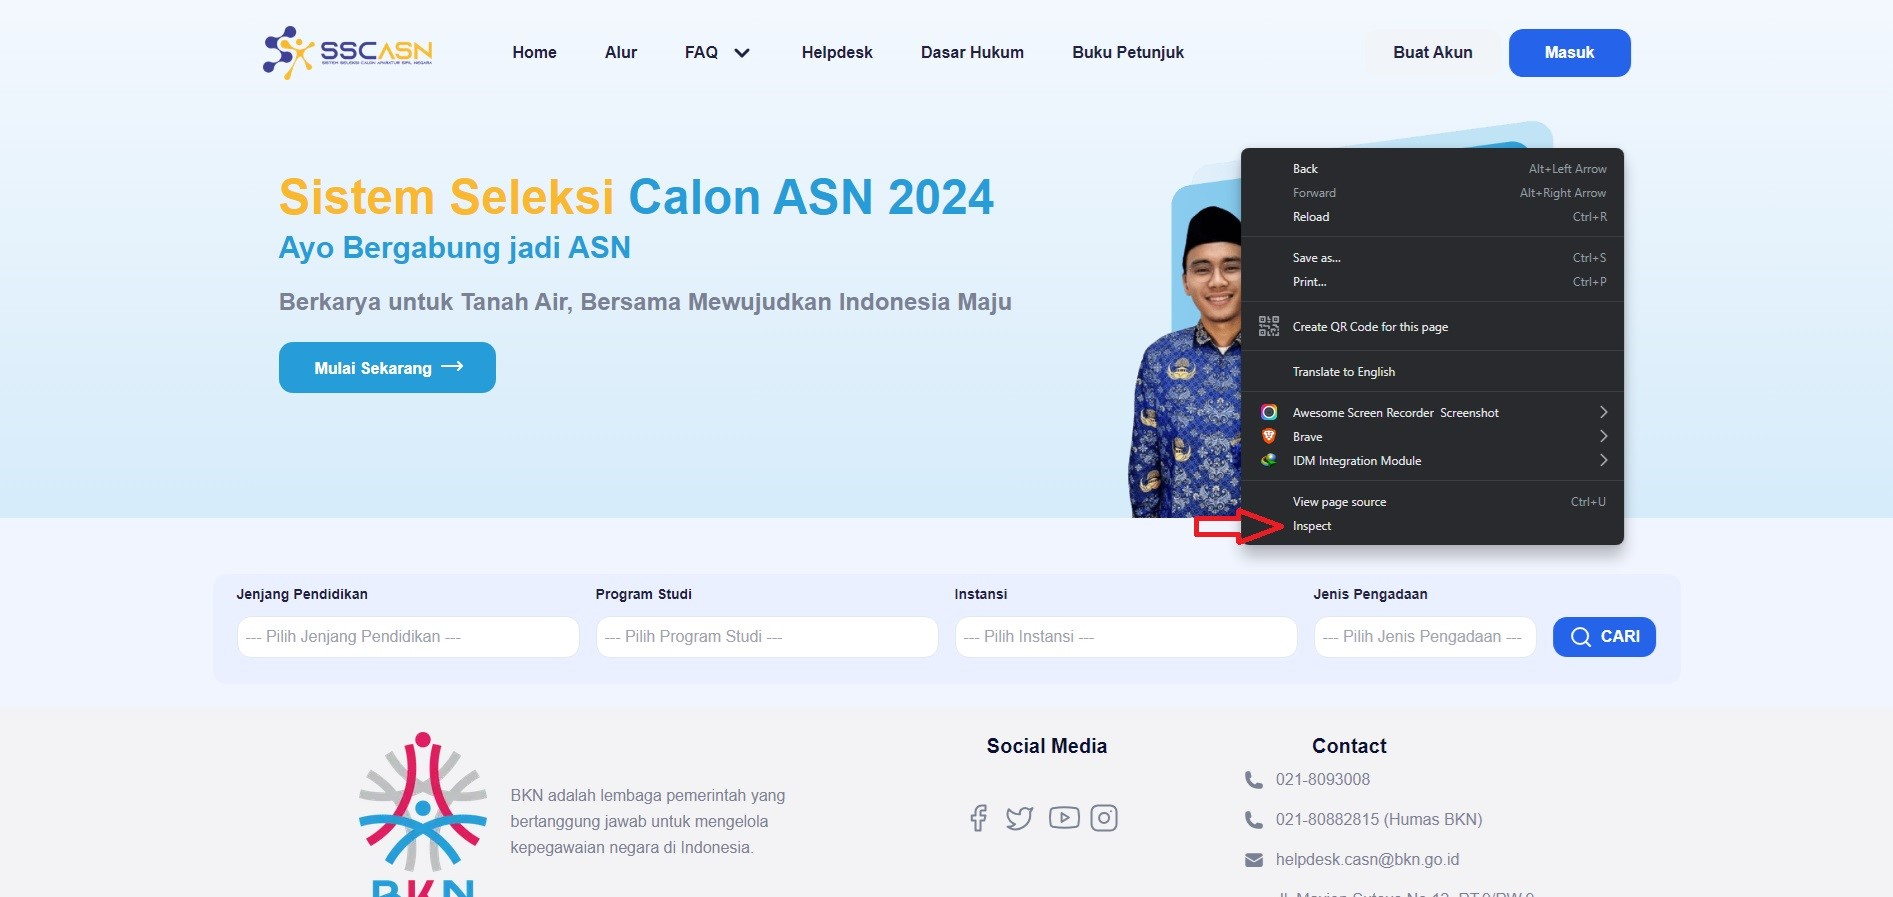
3.   Pergi ke halaman Network lalu Pilih Jenjang Pendidikan dan Program Studi
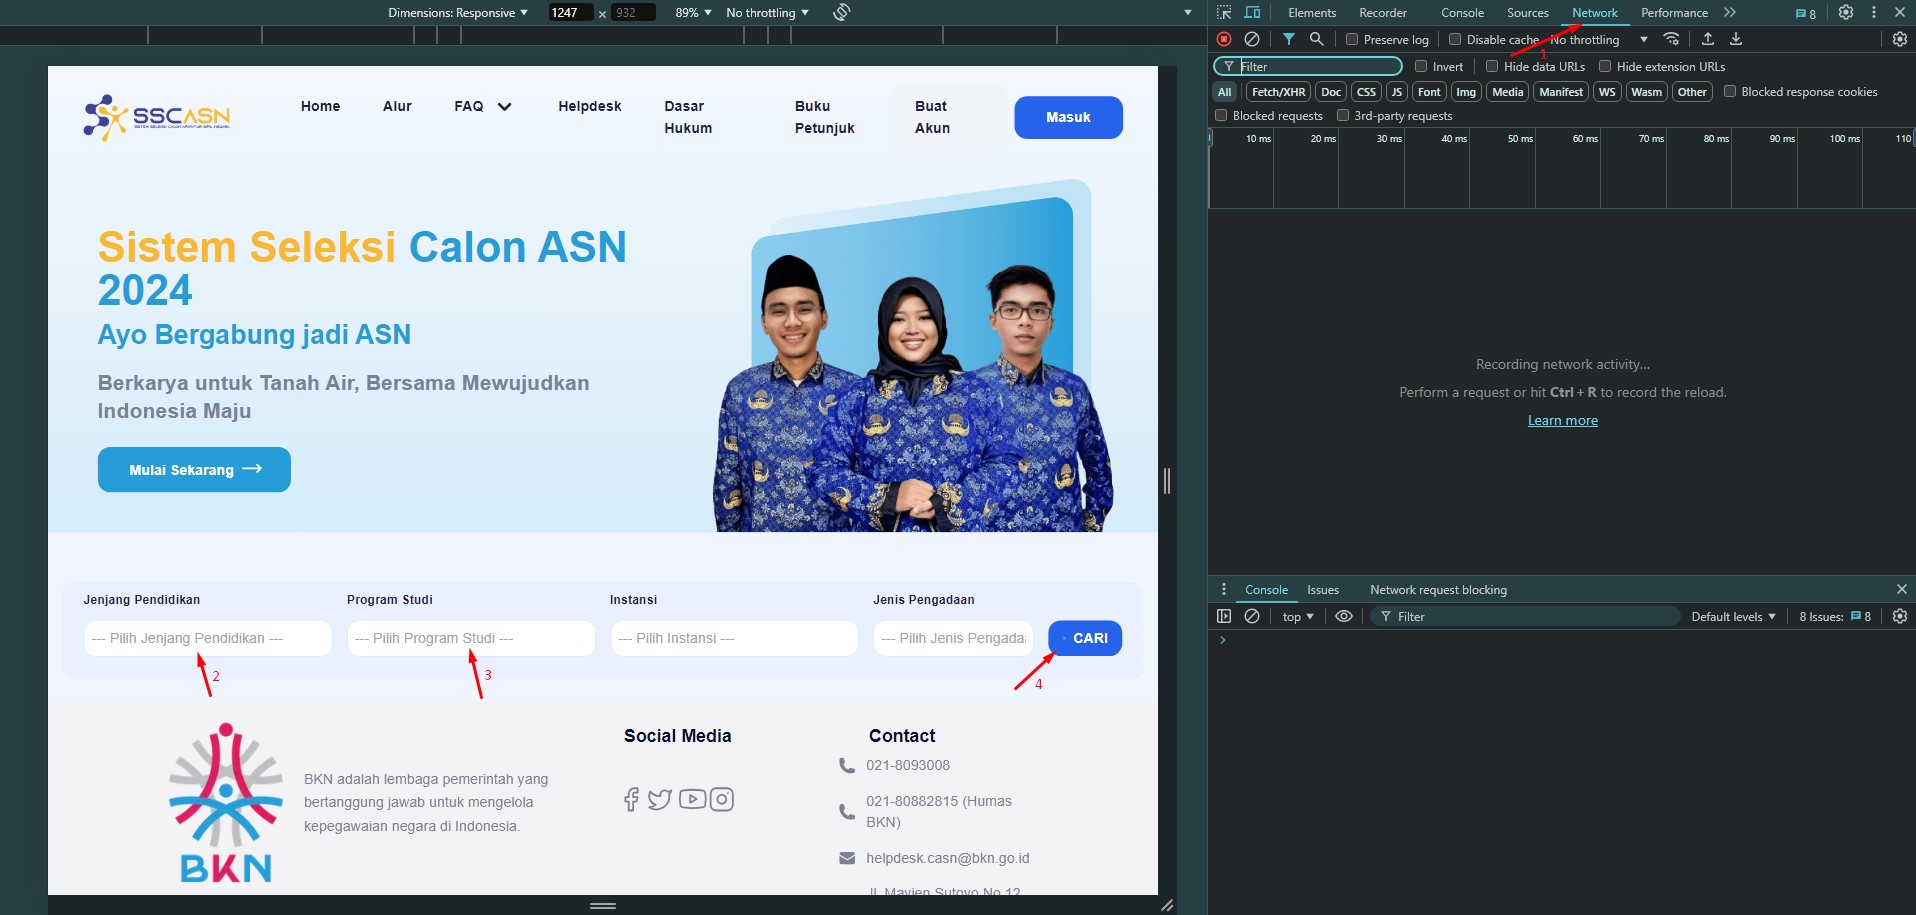
4.  Setelah klik Cari, nanti akan muncul seperti gambar dan catat angka Kode Pendidikan
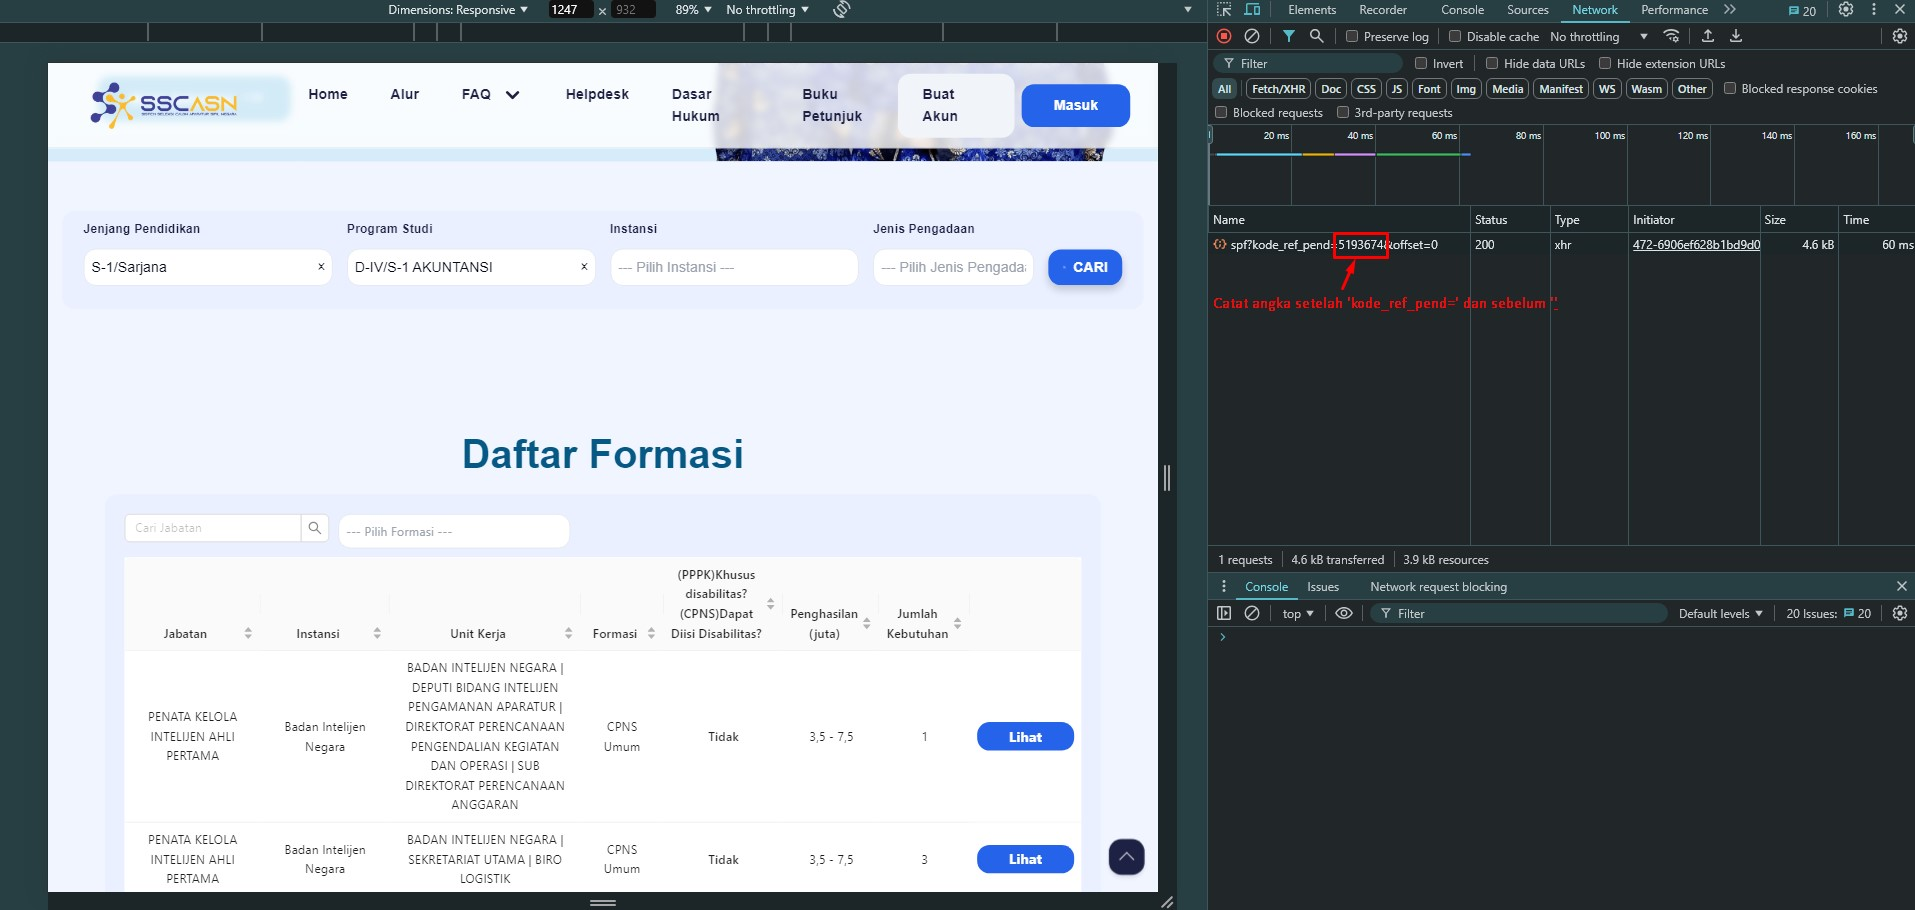
5. Ubah Kode Pendidikan pada code dengan angka yang sudah didapatkan tadi
6. Jalankan semua rangkaian code sesuai petunjuk, caranya klik tombol seperti gambar
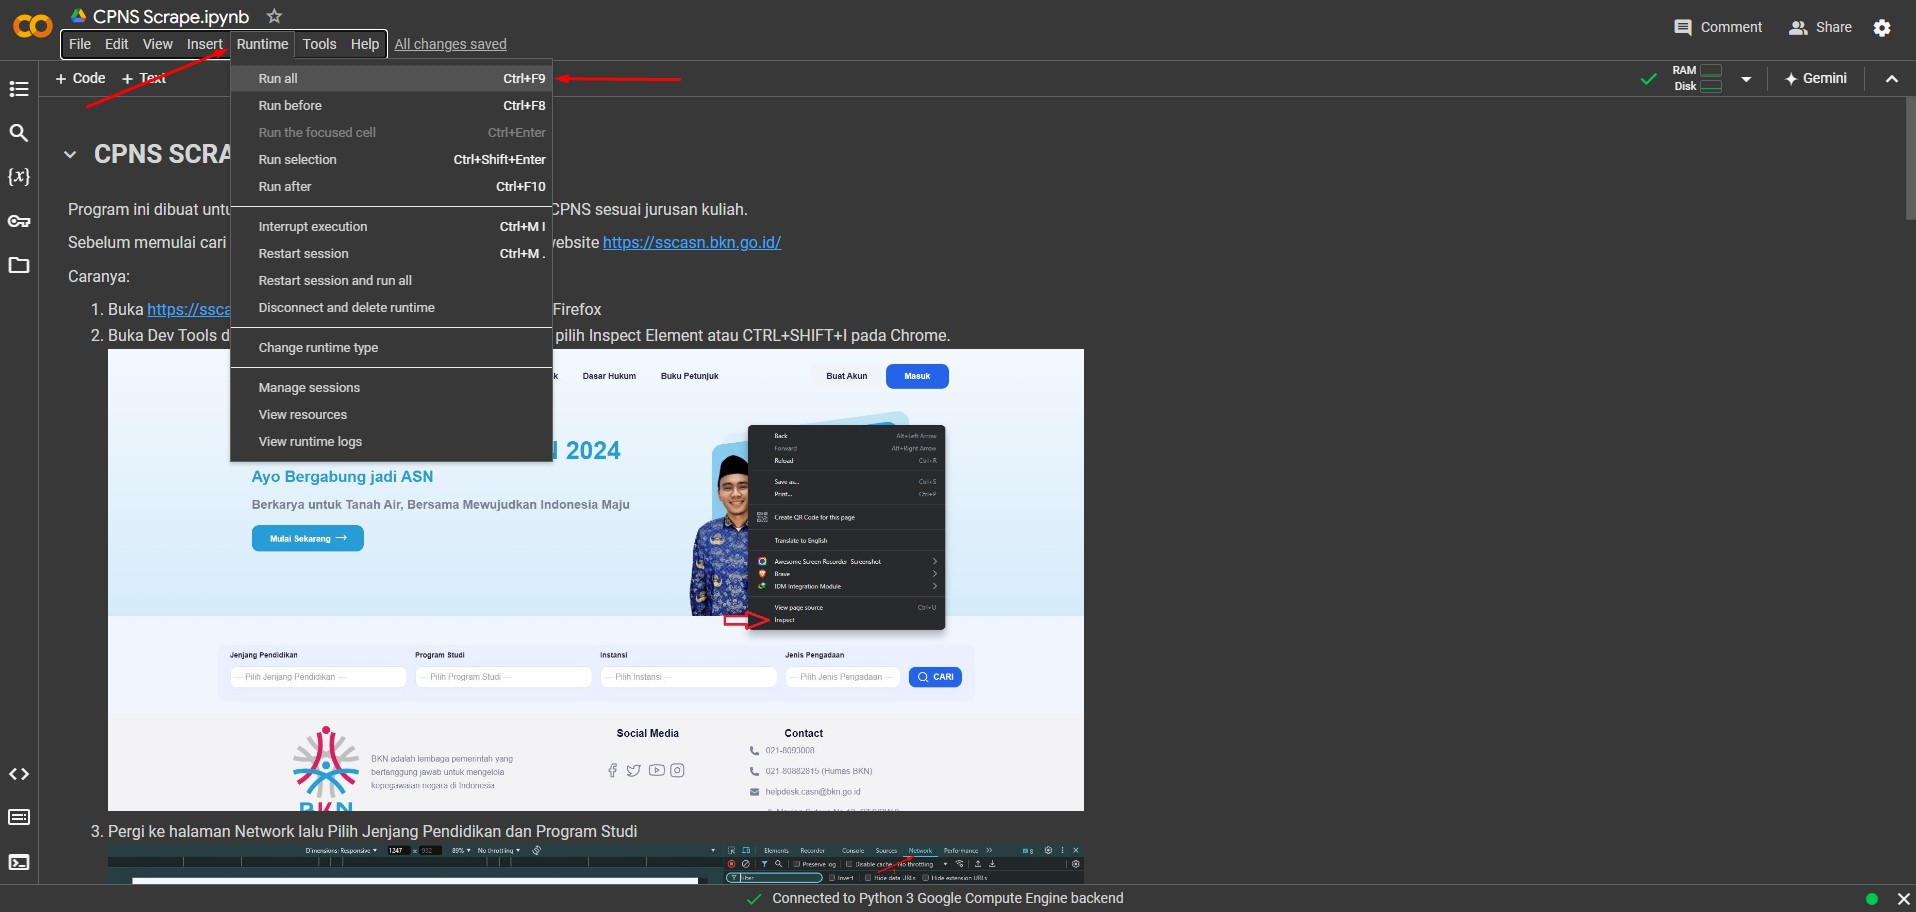

🔴 **Ubah Kode Pendidikan berikut ya! Setelah itu klik Runtime (pada bagian atas) > Run All atau CTRL+F9** 🔴

In [ ]:
# Masukkan Kode Pendidikan di dalam tanda kutip
kode_pendidikan = '5101050'

### 1. Import Library
Memuat library yang dibutuhkan program ini.

In [ ]:
from google.colab import files
import pandas as pd
from tqdm import tqdm
import requests
import json

### 2. Get CPNS API

In [ ]:
# Start - Do Not Change this ===================================================
headers = {
    'Accept': 'application/json, text/plain, */*',
    'Accept-Language': 'en-US,en;q=0.6',
    'Connection': 'keep-alive',
    'Origin': 'https://sscasn.bkn.go.id',
    'Referer': 'https://sscasn.bkn.go.id/',
    'Sec-Fetch-Dest': 'empty',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Site': 'same-site',
    'Sec-GPC': '1',
    'User-Agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Mobile Safari/537.36',
    'sec-ch-ua': '"Chromium";v="128", "Not;A=Brand";v="24", "Brave";v="128"',
    'sec-ch-ua-mobile': '?1',
    'sec-ch-ua-platform': '"Android"',
}
# End - Do Not Change this =====================================================

params = {
    'kode_ref_pend': kode_pendidikan,
    'offset': '0',
}

response = requests.get('https://api-sscasn.bkn.go.id/2024/portal/spf', params=params, headers=headers)

# Convert json into dictionary
cpns = response.json()

if (response.status_code==200):
  print("Datanya ada bwang, Lanjootttt!")
else:
  print("Gabisa, ga nemu datanya :(")

Datanya ada bwang, Lanjootttt!


### 3. Get Data CPNS
Nah, pada bagian ini akan diambil seluruh formasi CPNS pada setiap halaman.

In [ ]:
# Scrape all data
total = cpns['data']['meta']['total']
for i in tqdm(range(0,total,10), desc="Lagi ambilin datanya yak..."):
    params = {
        'kode_ref_pend': kode_pendidikan,
        'offset': str(i),
    }
    response = requests.get('https://api-sscasn.bkn.go.id/2024/portal/spf', headers=headers, params=params)
    if response.status_code != 204:
      response_dict = response.json()
    cpns['data']['data'].extend(response_dict['data']['data'])

Lagi ambilin datanya yak...: 100%|██████████| 135/135 [02:12<00:00,  1.02it/s]


### 4. Preview Data
Coba kita cek ya isi datanya seperti apa.

In [ ]:
# Preview First Data we got
cpns['data']['data'][0]

{'formasi_id': '53c582c4-4eda-49f3-a72f-35622b835b86',
 'ins_nm': 'Badan Intelijen Negara',
 'jp_nama': 'CPNS',
 'formasi_nm': 'UMUM',
 'jabatan_nm': 'PENATA KELOLA INTELIJEN AHLI PERTAMA',
 'lokasi_nm': 'BADAN INTELIJEN NEGARA | SEKRETARIAT UTAMA | PUSAT PENELITIAN DAN PENGEMBANGAN',
 'jumlah_formasi': 2,
 'disable': 0,
 'gaji_min': '3500000',
 'gaji_max': '7500000'}

### 5. Dict to Dataframe
Kita cek datanya dalam tabel yuk!

In [ ]:
df_list = []
for res in cpns['data']['data']:
  temp_df = {}
  temp_df['Link'] = 'https://sscasn.bkn.go.id/detailformasi/'+res['formasi_id']
  temp_df['Instansi'] = res["ins_nm"]
  temp_df['Lokasi'] = res["lokasi_nm"]
  temp_df['Formasi'] = res["formasi_nm"]
  temp_df['Jabatan'] = res["jabatan_nm"]
  temp_df['Quota'] = res["jumlah_formasi"]
  temp_df['Gaji Min'] = res["gaji_min"]
  temp_df['Gaji Max'] = res["gaji_max"]

  df_list.append(temp_df)
df = pd.DataFrame(df_list)
df

,Link,Instansi,Lokasi,Formasi,Jabatan,Quota,Gaji Min,Gaji Max
0,https://sscasn.bkn.go.id/detailformasi/53c582c...,Badan Intelijen Negara,BADAN INTELIJEN NEGARA | SEKRETARIAT UTAMA | P...,UMUM,PENATA KELOLA INTELIJEN AHLI PERTAMA,2,3500000,7500000
1,https://sscasn.bkn.go.id/detailformasi/8a01869...,Badan Intelijen Negara,BADAN INTELIJEN NEGARA | DEPUTI BIDANG INTELIJ...,UMUM,PENELAAH TEKNIS INTELIJEN,3,3500000,7500000
2,https://sscasn.bkn.go.id/detailformasi/1abff6b...,Badan Intelijen Negara,BADAN INTELIJEN NEGARA | DEPUTI BIDANG INTELIJ...,UMUM,PENELAAH TEKNIS INTELIJEN,1,3500000,7500000
3,https://sscasn.bkn.go.id/detailformasi/482a095...,Badan Intelijen Negara,BADAN INTELIJEN NEGARA | DEPUTI BIDANG INTELIJ...,UMUM,PENELAAH TEKNIS INTELIJEN,2,3500000,7500000
4,https://sscasn.bkn.go.id/detailformasi/5faac7e...,Badan Intelijen Negara,BADAN INTELIJEN NEGARA | DEPUTI BIDANG INTELIJ...,UMUM,PENELAAH TEKNIS INTELIJEN,1,3500000,7500000
...,...,...,...,...,...,...,...,...
1346,https://sscasn.bkn.go.id/detailformasi/d86d665...,Pemerintah Provinsi Sumatera Utara,PEMERINTAH PROVINSI SUMATERA UTARA | DINAS PEN...,UMUM,PERENCANA AHLI PERTAMA,1,2228560,2451416
1347,https://sscasn.bkn.go.id/detailformasi/da64c06...,Pemerintah Provinsi Sumatera Utara,PEMERINTAH PROVINSI SUMATERA UTARA | BADAN PER...,UMUM,PERENCANA AHLI PERTAMA,3,2228560,2451416
1348,https://sscasn.bkn.go.id/detailformasi/1d8f7c7...,Pemerintah Provinsi Sumatera Utara,PEMERINTAH PROVINSI SUMATERA UTARA | DINAS PER...,UMUM,STATISTISI AHLI PERTAMA,1,2228560,2451416
1349,https://sscasn.bkn.go.id/detailformasi/8a0186c...,Setjen WANTANNAS,SEKRETARIAT JENDERAL DEWAN KETAHANAN NASIONAL ...,PUTRA/PUTRI KALIMANTAN,SANDIMAN AHLI PERTAMA,1,7457120,8064378


### 6. Export to Excel
Langsung Download Filenya, ok

In [ ]:
# Determining the name of the file
file_name = 'Formasi CPNS.xlsx'

# Saving the excel
df.to_excel(file_name)
files.download(file_name)
print('Saved to Excel successfully.')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved to Excel successfully.


#  
`Created by Ray Rahmanda`